# Portafolios de Inversión
## Actividad en Clase
José Armando Melchor Soto

---

### Indicaciones
Descargar los cierres de Precio ajustado de Microsoft (2019-01-01 a 2024-01-01), calculo los rendimientos diarios, con estas encuentra e interpreta las siguientes métricas. 
- Rendimiento Esperado , diario y anual
- Varianza y Volatilidad, diaria y anual
- Asimetria de los rendimientos
- Gráfica la distribución de los rendimientos

---
### Librerías


In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

---

In [21]:
df = yf.download('MSFT', start= '2019-01-01', end= '2024-01-01')['Close']
df.head()

[*********************100%***********************]  1 of 1 completed


Ticker,MSFT
Date,
2019-01-02,94.945518
2019-01-03,91.452644
2019-01-04,95.706047
2019-01-07,95.828110
2019-01-08,96.522949


### Rendimiento

In [22]:
daily_returns= (df/df.shift()-1).dropna()
daily_returns

Ticker,MSFT
Date,
2019-01-03,-0.036788
2019-01-04,0.046509
2019-01-07,0.001275
2019-01-08,0.007251
2019-01-09,0.014300
...,...
2023-12-22,0.002784
2023-12-26,0.000214
2023-12-27,-0.001575


In [23]:
daily_returns.mean()

Ticker
MSFT    0.001271
dtype: float64

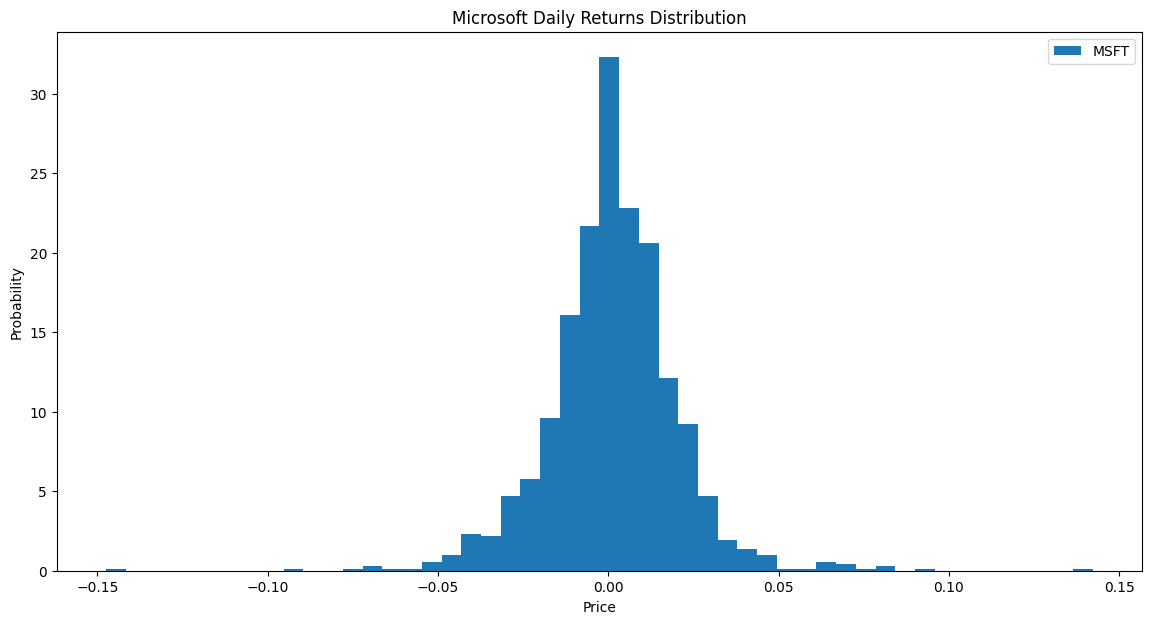

In [24]:
plt.figure(figsize=(14, 7))
plt.hist(daily_returns, label=daily_returns.keys(), density=True, bins=50)
plt.title('Microsoft Daily Returns Distribution')
plt.xlabel('Price')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Rendimiento Esperado , dirario y anual

In [25]:
df= pd.DataFrame(columns=daily_returns.keys()).T

df['Daily_rate']= daily_returns.mean()
df['Anual_rate']= daily_returns.mean()*252

df*100

,Daily_rate,Anual_rate
Ticker,,
MSFT,0.127101,32.029497


### Varianza y Volatilidad , diaria y anual

In [26]:
df['Daily_Var']= daily_returns.var()
df['Anual_Var']= daily_returns.var()*np.sqrt(252)


In [27]:
df['Daily_Vol']= daily_returns.std()
df['Anual_Vol']= daily_returns.std()*np.sqrt(252)

In [30]:
df

,Daily_rate,Anual_rate,Daily_Var,Anual_Var,Daily_Vol,Anual_Vol,CV
Ticker,,,,,,,
MSFT,0.001271,0.320295,0.000369,0.005857,0.019207,0.304908,0.951961


### Coeficiente de Variación 

In [ ]:
df['CV']= df['Anual_Vol']/df['Anual_rate']  
### 0.30/0.3202
df['CV']

Ticker
MSFT    0.951961
Name: CV, dtype: float64

Podemos decir que esta acción tiene un coeficiente muy alto, por lo que puede ser bueno relativamente hablando. Pero a la vez no tiene tanto valor esto, porque no hay un mejor activo con el cual pudieramos comparar este activo. Por lo que en general , este calculo no sirve si nomass buscamos conseguir información de un solo activo.

### Asimetría 

In [28]:
daily_returns.skew()

Ticker
MSFT   -0.004066
dtype: float64

Tiende a una asimetría negativa , por lo que tiende a que pueda haber perdidas, se busca que haya ganancias , asi que se puede buscar un activo mejor.
